In [1]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/빅데이터/'
csv_files = ['201301_BolsaFamilia_filtered.csv', '201801_BolsaFamilia_filtered.csv',
             '202101_BolsaFamilia_filtered.csv', '202303_BolsaFamilia_filtered.csv']

for file in csv_files:
    file_path = os.path.join(base_path, file)

    date_part = file.split('_')[0]  # 파일 이름에서 날짜 부분 추출

    new_file_name = os.path.join(base_path, f"{date_part}_BolsaFamilia_filtered.csv")

    if os.path.exists(new_file_name):
        print(f"파일 '{new_file_name}' 이미 존재합니다. 저장하지 않습니다.")
    else:
        # 파일 로드 (구분자 세미콜론, 필요한 열만 읽기)
        try:
            df = pd.read_csv(file_path, delimiter=';', usecols=['MES_REFERENCIA', 'UF', 'NIS', 'FAVORECIDO', 'VALOR'])

            # 'MES_REFERENCIA'가 파일명에 포함된 날짜와 일치하는 행만 필터링
            df_filtered = df[df['MES_REFERENCIA'].astype(str).str.contains(date_part)]

            # 필터링된 데이터가 비어 있지 않으면 파일로 저장
            if not df_filtered.empty:
                # 필터링된 df를 새 CSV 파일로 저장
                df_filtered.to_csv(new_file_name, index=False)
                print(f"파일 '{new_file_name}' 저장 완료!")
            else:
                print(f"파일 '{file}'에서 {date_part}에 해당하는 데이터가 없습니다.")
        except Exception as e:
            print(f"파일 '{file}'을 읽는 중 오류가 발생했습니다: {e}")


Mounted at /content/drive
파일 '/content/drive/MyDrive/빅데이터/201301_BolsaFamilia_filtered.csv' 이미 존재합니다. 저장하지 않습니다.
파일 '/content/drive/MyDrive/빅데이터/201801_BolsaFamilia_filtered.csv' 이미 존재합니다. 저장하지 않습니다.
파일 '/content/drive/MyDrive/빅데이터/202101_BolsaFamilia_filtered.csv' 이미 존재합니다. 저장하지 않습니다.
파일 '/content/drive/MyDrive/빅데이터/202303_BolsaFamilia_filtered.csv' 이미 존재합니다. 저장하지 않습니다.


In [2]:
!pip install xlrd

# 브라질의 주별 PIB(총생산) 히트맵

In [3]:
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/빅데이터/'  # 경로 설정

excel_file = os.path.join(base_path, 'PIB_Otica_Renda_UF.xls')

# 지역 이름 약칭 딕셔너리
tabela_dict = {
    "Tabela2": "Norte",
    "Tabela3": "RO",  # Rondônia -> RO
    "Tabela4": "AC",  # Acre -> AC
    "Tabela5": "AM",  # Amazonas -> AM
    "Tabela6": "RR",  # Roraima -> RR
    "Tabela7": "PA",  # Pará -> PA
    "Tabela8": "AP",  # Amapá -> AP
    "Tabela9": "TO",  # Tocantins -> TO
    "Tabela10": "Nordeste",
    "Tabela11": "MA",  # Maranhão -> MA
    "Tabela12": "PI",  # Piauí -> PI
    "Tabela13": "CE",  # Ceará -> CE
    "Tabela14": "RN",  # Rio Grande do Norte -> RN
    "Tabela15": "PB",  # Paraíba -> PB
    "Tabela16": "PE",  # Pernambuco -> PE
    "Tabela17": "AL",  # Alagoas -> AL
    "Tabela18": "SE",  # Sergipe -> SE
    "Tabela19": "BA",  # Bahia -> BA
    "Tabela20": "Sudeste",
    "Tabela21": "MG",  # Minas Gerais -> MG
    "Tabela22": "ES",  # Espírito Santo -> ES
    "Tabela23": "RJ",  # Rio de Janeiro -> RJ
    "Tabela24": "SP",  # São Paulo -> SP
    "Tabela25": "Sul",
    "Tabela26": "PR",  # Paraná -> PR
    "Tabela27": "SC",  # Santa Catarina -> SC
    "Tabela28": "RS",  # Rio Grande do Sul -> RS
    "Tabela29": "Centro-Oeste",
    "Tabela30": "MS",  # Mato Grosso do Sul -> MS
    "Tabela31": "MT",  # Mato Grosso -> MT
    "Tabela32": "GO",  # Goiás -> GO
    "Tabela33": "DF"   # Distrito Federal -> DF
}

# 엑셀 파일의 모든 시트 이름 가져오기
xls = pd.ExcelFile(excel_file)
sheet_names = xls.sheet_names

result_dfs = []

for sheet in sheet_names:
    if 'Tabela' in sheet and sheet != 'Tabela1':
        df = pd.read_excel(excel_file, sheet_name=sheet)

        # "PIB - Ótica Produção" 찾기
        pib_producao_rows = df[df.iloc[:, 0] == 'PIB - Ótica Produção']

        # 1부터 12까지의 열을 추출 (2010-2021 데이터)
        pib_producao_filtered = pib_producao_rows.iloc[:, 1:13].reset_index(drop=True)

        # Tabela 이름을 지역 약칭으로 바꾸기 (약칭이 없으면 풀네임을 사용)
        tabela_name = sheet
        if tabela_name in tabela_dict:
            uf = tabela_dict[tabela_name]
        else:
            uf = tabela_name

        # UF 열 추가
        pib_producao_filtered['UF'] = uf

        result_dfs.append(pib_producao_filtered)

pib_df = pd.concat(result_dfs, ignore_index=True)

# 열 이름을 2010부터 2021까지로 설정 (UF 열을 포함한 13개 열)
pib_df.columns = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', 'UF']

# 숫자 값을 자연수로 반올림
pib_df.iloc[:, :-1] = pib_df.iloc[:, :-1].round(0).astype(int)

# 과학적 표기법을 사용하지 않도록 설정
pd.options.display.float_format = '{:,.0f}'.format

print(pib_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       2010      2011      2012      2013      2014      2015      2016  \
0    207093   241,028   259,101   292,442   308,077   320,688   337,302   
1     23907    27,575    30,113    31,121    34,031    36,563    39,460   
2      8342     8,949    10,138    11,474    13,459    13,623    13,754   
3     60877    70,734    72,243    83,051    86,669    86,568    89,040   
4      6639     7,304     7,711     9,011     9,744    10,243    11,013   
5     82684    98,711   107,081   121,225   124,585   130,900   138,108   
6      8237     9,409    11,131    12,763    13,400    13,861    14,342   
7     16404    18,346    20,684    23,797    26,189    28,930    31,585   
8    522769   583,413   653,067   724,524   805,099   848,579   898,362   
9     46309    52,144    60,490    67,695    76,842    78,476    85,310   
10    22269    25,941    28,638    31,284    3

In [4]:
import folium
import json
from folium import Choropleth
import os


base_path = '/content/drive/MyDrive/빅데이터/'

# 브라질 GeoJSON 파일
geojson_file = os.path.join(base_path, 'Brasil.json')

# PIB 데이터
pib_data_file = os.path.join(base_path, 'preprocessed_PIB_data.csv')

with open(geojson_file, 'r', encoding='utf-8') as f:
    brasil_geojson = json.load(f)

pib_df = pd.read_csv(pib_data_file)

# 수치형 PIB 열만 선택하여 2010년부터 2021년까지의 연도별 PIB 합산
numeric_columns = pib_df.select_dtypes(include=['number']).columns  # 수치형 열만 선택
total_pib = pib_df[numeric_columns].sum(axis=1)  # 각 주별로 12년간 PIB 합산

# GeoJSON에 존재하는 'UF'만 필터링 (GeoJSON에서 존재하는 'UF'와 매칭된 주만 사용)
matching_ufs = [feature['properties']['UF'] for feature in brasil_geojson['features']]
pib_df_filtered = pib_df[pib_df['UF'].isin(matching_ufs)]

# 각 주와 해당 주의 PIB 총합을 매핑
region_pib_mapping = dict(zip(pib_df_filtered['UF'], total_pib[pib_df_filtered.index]))  # 'UF'와 PIB 총합을 매핑

# 색상 조정
max_pib = max(region_pib_mapping.values())  # 최고 PIB 값
min_pib = min(region_pib_mapping.values())  # 최소 PIB 값

# 동적 색상 구간 설정
quantiles = [min_pib] + [pd.Series(list(region_pib_mapping.values())).quantile(q) for q in [0.25, 0.5, 0.75]] + [max_pib]

# Folium 지도
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Choropleth 지도 (히트맵)
Choropleth(
    geo_data=brasil_geojson,  # GeoJSON 데이터
    name="choropleth",
    data=region_pib_mapping,  # PIB 총합 데이터
    columns=['UF', 'Total_PIB'],  # 'UF'와 'Total_PIB' 열
    key_on='feature.properties.UF',  # GeoJSON 파일 내 'UF'와 연결되는 필드명
    fill_color='YlGn',  # 'YlGn' 색상 사용 (Yellow to Green 색상)
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total PIB (2010-2021)",  # 지도 범례
    threshold_scale=quantiles,  # quantiles을 사용하여 색상 구간 설정
    nan_fill_opacity=0  # 'nan' 값은 표시되지 않도록 처리
).add_to(m)

title = "PIB Total por Estado"
title_html = f'<h3 align="center" style="font-size:20px"><b>{title}</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

output_map_path = os.path.join(base_path, "brazil_pib_map_green.html")
m.save(output_map_path)

# 지도 디스플레이
m


In [5]:
base_path = '/content/drive/MyDrive/빅데이터/'
excel_file_path = os.path.join(base_path, "estimativa_dou_2024.xls")
csv_file_path = os.path.join(base_path, "estimativa_dou_2024.csv")

# 엑셀 파일을 CSV로 변환
if not os.path.exists(csv_file_path):
    population_df = pd.read_excel(excel_file_path)

    population_df.to_csv(csv_file_path, index=False)
    print(f"CSV 파일로 저장 완료: {csv_file_path}")
else:
    print(f"CSV 파일 '{csv_file_path}'이(가) 이미 존재합니다. 변환을 건너뜁니다.")

CSV 파일 '/content/drive/MyDrive/빅데이터/estimativa_dou_2024.csv'이(가) 이미 존재합니다. 변환을 건너뜁니다.


# 주별 인구수를 고려한 인당 PIB

In [6]:
excel_file_path = os.path.join(base_path, "estimativa_dou_2024.xls")  # 엑셀 파일 경로
csv_file_path = os.path.join(base_path, "estimativa_dou_2024.csv")    # 저장할 CSV 파일 경로


if not os.path.exists(csv_file_path):

    # 엑셀 데이터를 CSV로 저장
    population_df.to_csv(csv_file_path, index=False)

    print(f"CSV 파일로 저장 완료: {csv_file_path}")
else:
    print(f"CSV 파일이 이미 존재합니다: {csv_file_path}")

population_df = pd.read_excel(excel_file_path)

# GeoJSON 파일
geojson_file_path = os.path.join(base_path, 'Brasil.json')
with open(geojson_file_path, 'r', encoding='utf-8') as f:
    brasil_geojson = json.load(f)

# 주 이름을 축약형으로 변환하고 인구수 딕셔너리 생성
uf_fullname_dict = {
    "Norte": "Norte", "Rondônia": "RO", "Acre": "AC", "Amazonas": "AM", "Roraima": "RR", "Pará": "PA", "Amapá": "AP",
    "Tocantins": "TO", "Nordeste": "Nordeste", "Maranhão": "MA", "Piauí": "PI", "Ceará": "CE", "Rio Grande do Norte": "RN",
    "Paraíba": "PB", "Pernambuco": "PE", "Alagoas": "AL", "Sergipe": "SE", "Bahia": "BA", "Sudeste": "Sudeste", "Minas Gerais": "MG",
    "Espírito Santo": "ES", "Rio de Janeiro": "RJ", "São Paulo": "SP", "Sul": "Sul", "Paraná": "PR", "Santa Catarina": "SC",
    "Rio Grande do Sul": "RS", "Centro-Oeste": "Centro-Oeste", "Mato Grosso do Sul": "MS", "Mato Grosso": "MT", "Goiás": "GO",
    "Distrito Federal": "DF"
}

# 인구수 데이터 로드
population_data = population_df.iloc[:, [0, 1]]  # 첫 번째 열: 주 이름, 두 번째 열: 인구수

population_dict = {}
for idx, row in population_data.iterrows():
    full_name = row[0]  # 주 이름 (풀 네임)
    population = row[1]  # 인구수

    # 풀 네임을 축약형으로 변환
    if full_name in uf_fullname_dict:
        short_name = uf_fullname_dict[full_name]
        population_dict[short_name] = population

numeric_columns = pib_df.select_dtypes(include=['number']).columns  # 수치형 열만 선택
total_pib = pib_df[numeric_columns].sum(axis=1)  # 각 주별로 12년간 PIB 합산

# 각 주별 PIB/인구 비율 계산
pib_per_capita = {}
for idx, row in pib_df.iterrows():
    uf = row['UF']  # 주 이름
    if uf in population_dict:  # 주별 인구수가 존재하는 경우
        total_population = population_dict[uf]
        pib_per_capita[uf] = total_pib[idx] / total_population

max_pib_per_capita = max(pib_per_capita.values())
min_pib_per_capita = min(pib_per_capita.values())

# Folium 지도
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Choropleth 지도 (히트맵)
Choropleth(
    geo_data=brasil_geojson,
    name="choropleth",
    data=pib_per_capita,
    columns=['UF', 'pib_per_capita'],
    key_on='feature.properties.UF',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Municipal PIB/Population",
    threshold_scale=[min_pib_per_capita, min_pib_per_capita + (max_pib_per_capita - min_pib_per_capita) * 0.25,
                     min_pib_per_capita + (max_pib_per_capita - min_pib_per_capita) * 0.5,
                     min_pib_per_capita + (max_pib_per_capita - min_pib_per_capita) * 0.75, max_pib_per_capita],
    nan_fill_opacity=0  # 'nan' 값은 표시되지 않도록 처리
).add_to(m)

title = "PIB per capita por Estado"
title_html = f'<h3 align="center" style="font-size:20px"><b>{title}</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

map_file_path = os.path.join(base_path, "brazil_pib_per_capita_map_pink.html")
m.save(map_file_path)

print(f"Folium 지도 저장 완료: {map_file_path}")

# 지도 디스플레이
m


CSV 파일이 이미 존재합니다: /content/drive/MyDrive/빅데이터/estimativa_dou_2024.csv


<ipython-input-6-2cd07b3e7879>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  full_name = row[0]  # 주 이름 (풀 네임)
<ipython-input-6-2cd07b3e7879>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  population = row[1]  # 인구수


Folium 지도 저장 완료: /content/drive/MyDrive/빅데이터/brazil_pib_per_capita_map_pink.html


CSV 파일이 이미 존재합니다: /content/drive/MyDrive/빅데이터/estimativa_dou_2024.csv


<ipython-input-7-5ad702c77c57>:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  full_name = row[0]  # 주 이름 (풀 네임)
<ipython-input-7-5ad702c77c57>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  population = row[1]  # 인구수


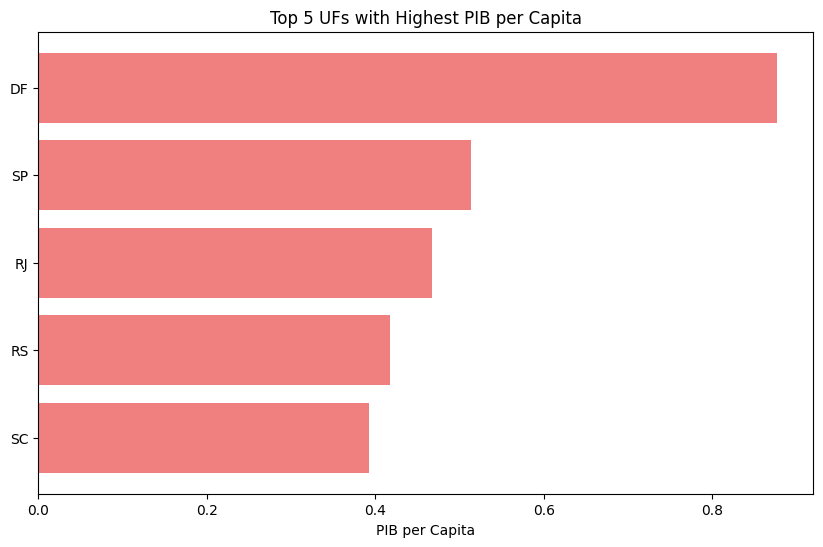

In [7]:
import pandas as pd
import os
import folium
import json
import matplotlib.pyplot as plt
from folium import Choropleth
from IPython.display import display  # folium 지도 출력용

excel_file_path = os.path.join(base_path, "estimativa_dou_2024.xls")
csv_file_path = os.path.join(base_path, "estimativa_dou_2024.csv")

if not os.path.exists(csv_file_path):
    population_df.to_csv(csv_file_path, index=False)
    print(f"CSV 파일로 저장 완료: {csv_file_path}")
else:
    print(f"CSV 파일이 이미 존재합니다: {csv_file_path}")

population_df = pd.read_excel(excel_file_path)

# GeoJSON 파일 로딩 (브라질 주별 지도)
geojson_file_path = os.path.join(base_path, 'Brasil.json')
with open(geojson_file_path, 'r', encoding='utf-8') as f:
    brasil_geojson = json.load(f)

uf_fullname_dict = {
    "Norte": "Norte", "Rondônia": "RO", "Acre": "AC", "Amazonas": "AM", "Roraima": "RR", "Pará": "PA", "Amapá": "AP",
    "Tocantins": "TO", "Nordeste": "Nordeste", "Maranhão": "MA", "Piauí": "PI", "Ceará": "CE", "Rio Grande do Norte": "RN",
    "Paraíba": "PB", "Pernambuco": "PE", "Alagoas": "AL", "Sergipe": "SE", "Bahia": "BA", "Sudeste": "Sudeste", "Minas Gerais": "MG",
    "Espírito Santo": "ES", "Rio de Janeiro": "RJ", "São Paulo": "SP", "Sul": "Sul", "Paraná": "PR", "Santa Catarina": "SC",
    "Rio Grande do Sul": "RS", "Centro-Oeste": "Centro-Oeste", "Mato Grosso do Sul": "MS", "Mato Grosso": "MT", "Goiás": "GO",
    "Distrito Federal": "DF"
}

# 인구수 데이터 로드
population_data = population_df.iloc[:, [0, 1]]  # 첫 번째 열: 주 이름, 두 번째 열: 인구수

population_dict = {}
for idx, row in population_data.iterrows():
    full_name = row[0]  # 주 이름 (풀 네임)
    population = row[1]  # 인구수

    if full_name in uf_fullname_dict:
        short_name = uf_fullname_dict[full_name]
        population_dict[short_name] = population

numeric_columns = pib_df.select_dtypes(include=['number']).columns  # 수치형 열만 선택
total_pib = pib_df[numeric_columns].sum(axis=1)  # 각 주별로 12년간 PIB 합산

# 각 주별 PIB/인구 비율 계산
pib_per_capita = {}
for idx, row in pib_df.iterrows():
    uf = row['UF']  # 주 이름
    if uf in population_dict:  # 주별 인구수가 존재하는 경우
        total_population = population_dict[uf]
        pib_per_capita[uf] = total_pib[idx] / total_population

max_pib_per_capita = max(pib_per_capita.values())
min_pib_per_capita = min(pib_per_capita.values())

# Folium 지도
m2 = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Choropleth 지도 (히트맵)
Choropleth(
    geo_data=brasil_geojson,  # GeoJSON 데이터
    name="choropleth",
    data=pib_per_capita,  # PIB/인구 비율 데이터
    columns=['UF', 'pib_per_capita'],  # 'UF'와 PIB/인구 비율 열
    key_on='feature.properties.UF',  # GeoJSON 파일 내 'UF'와 연결되는 필드명
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Municipal PIB/Population",  # 범례 이름 수정
    threshold_scale=[min_pib_per_capita, min_pib_per_capita + (max_pib_per_capita - min_pib_per_capita) * 0.25,
                     min_pib_per_capita + (max_pib_per_capita - min_pib_per_capita) * 0.5,
                     min_pib_per_capita + (max_pib_per_capita - min_pib_per_capita) * 0.75, max_pib_per_capita],
    nan_fill_opacity=0  # 'nan' 값은 표시되지 않도록 처리
).add_to(m2)

title = "PIB per capita por Estado"
title_html = f'<h3 align="center" style="font-size:20px"><b>{title}</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

display(m2)

# 두 글자 이름 필터링
pib_per_capita_filtered = {uf: value for uf, value in pib_per_capita.items() if len(uf) == 2}

# 평균 PIB/인구 비율이 가장 높은 주 5개 추출
top_5_uf = sorted(pib_per_capita_filtered.items(), key=lambda x: x[1], reverse=True)[:5]

top_5_uf_names = [uf for uf, value in top_5_uf]
top_5_uf_values = [value for uf, value in top_5_uf]

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_5_uf_names, top_5_uf_values, color='lightcoral')
plt.xlabel('PIB per Capita')
plt.title('Top 5 UFs with Highest PIB per Capita')
plt.gca().invert_yaxis()  # 가장 높은 값이 위로 오도록 설정
plt.show()

Distrito Federal (연방구역)
São Paulo (상파울루)
Rio de Janeiro (리우데자네이루)
Rio Grande do Sul (히우그란지두술)
Santa Catarina (산타카타리나)

# 브라질 주별 평균 지원금 수령액 히트맵

In [8]:
base_path = '/content/drive/My Drive/빅데이터/'

csv_files = ['201301_BolsaFamilia_filtered.csv', '201801_BolsaFamilia_filtered.csv',
             '202101_BolsaFamilia_filtered.csv', '202303_BolsaFamilia_filtered.csv']

df_list = []

# 각 CSV 파일을 처리
for file in csv_files:
    df = pd.read_csv(os.path.join(base_path, file))

    # 'UF'와 'VALOR' 열만 선택하여 주별로 평균 계산
    df_avg = df.groupby('UF')['VALOR'].mean().reset_index()

    df_list.append(df_avg)

# 데이터 결합
df_combined = pd.concat(df_list, ignore_index=True)

# 주별로 평균 계산
df_final2 = df_combined.groupby('UF')['VALOR'].mean().reset_index()

# 컬럼 이름 변경 ('VALOR' -> 'Média de Valor')
df_final2 = df_final2.rename(columns={'VALOR': 'Média de Valor'})

df_final2.to_csv(os.path.join(base_path, 'Bolsa_Familia_Avg_by_UF_Final.csv'), index=False)

print(df_final2)

    UF  Média de Valor
0   AC             349
1   AL             293
2   AM             324
3   AP             319
4   BA             285
5   CE             286
6   DF             281
7   ES             282
8   GO             277
9   MA             309
10  MG             284
11  MS             291
12  MT             285
13  PA             337
14  PB             327
15  PE             318
16  PI             335
17  PR             318
18  RJ             318
19  RN             317
20  RO             322
21  RR             357
22  RS             318
23  SC             329
24  SE             313
25  SP             319
26  TO             336


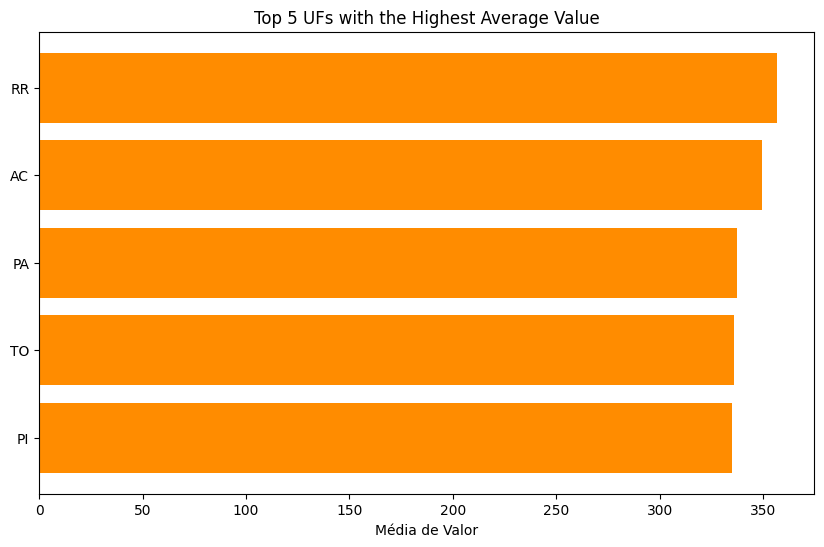

In [9]:
import folium
import json
import pandas as pd
import matplotlib.pyplot as plt
from folium import Choropleth

# 'Brasil.json' 파일 로드
with open(os.path.join(base_path, 'Brasil.json'), 'r') as f:
    brasil_geojson = json.load(f)

# 최종 CSV 파일 로드
df_avg_by_uf = pd.read_csv(os.path.join(base_path, 'Bolsa_Familia_Avg_by_UF_Final.csv'))

# 최댓값과 최저값 계산
min_value = df_avg_by_uf['Média de Valor'].min()
max_value = df_avg_by_uf['Média de Valor'].max()

# 색상 구간 (최솟값과 최댓값을 기준으로 동적으로 설정)
bins = [min_value, (max_value - min_value) * 0.25 + min_value,
        (max_value - min_value) * 0.5 + min_value,
        (max_value - min_value) * 0.75 + min_value, max_value]

# Folium 지도 생성
brasil_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Choropleth로 히트맵 추가 (주황색 계열로 변경)
choropleth = Choropleth(
    geo_data=brasil_geojson,
    data=df_avg_by_uf,
    columns=['UF', 'Média de Valor'],
    key_on='feature.properties.UF',  # 'properties'에서 'UF'를 기준으로 히트맵 표시
    fill_color='Oranges',  # 색상 스케일을 주황색 계열로 설정
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Média de Valor',
    bins=bins  # 최댓값과 최저값을 기준으로 색상 구간 설정
).add_to(brasil_map)

# 타이틀 추가
title = "Média de Valor por UF"
title_html = f'<h3 align="center" style="font-size:20px"><b>{title}</b></h3>'
brasil_map.get_root().html.add_child(folium.Element(title_html))

# 지도 저장
brasil_map.save(os.path.join(base_path, 'Bolsa_Familia_Map_Final_Orange.html'))

# 지도 디스플레이
display(brasil_map)

# 제일 많이 수령한 주 5개 추출 (Média de Valor가 높은 순서대로)
top_5_uf = df_avg_by_uf.nlargest(5, 'Média de Valor')

# 상위 5개 주와 해당 수령 금액 평균
top_5_uf_names = top_5_uf['UF']
top_5_uf_values = top_5_uf['Média de Valor']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(top_5_uf_names, top_5_uf_values, color='darkorange')
plt.xlabel('Média de Valor')
plt.title('Top 5 UFs with the Highest Average Value')
plt.gca().invert_yaxis()  # 가장 높은 값이 위로 오도록 설정
plt.show()

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', 'UF'],
      dtype='object')


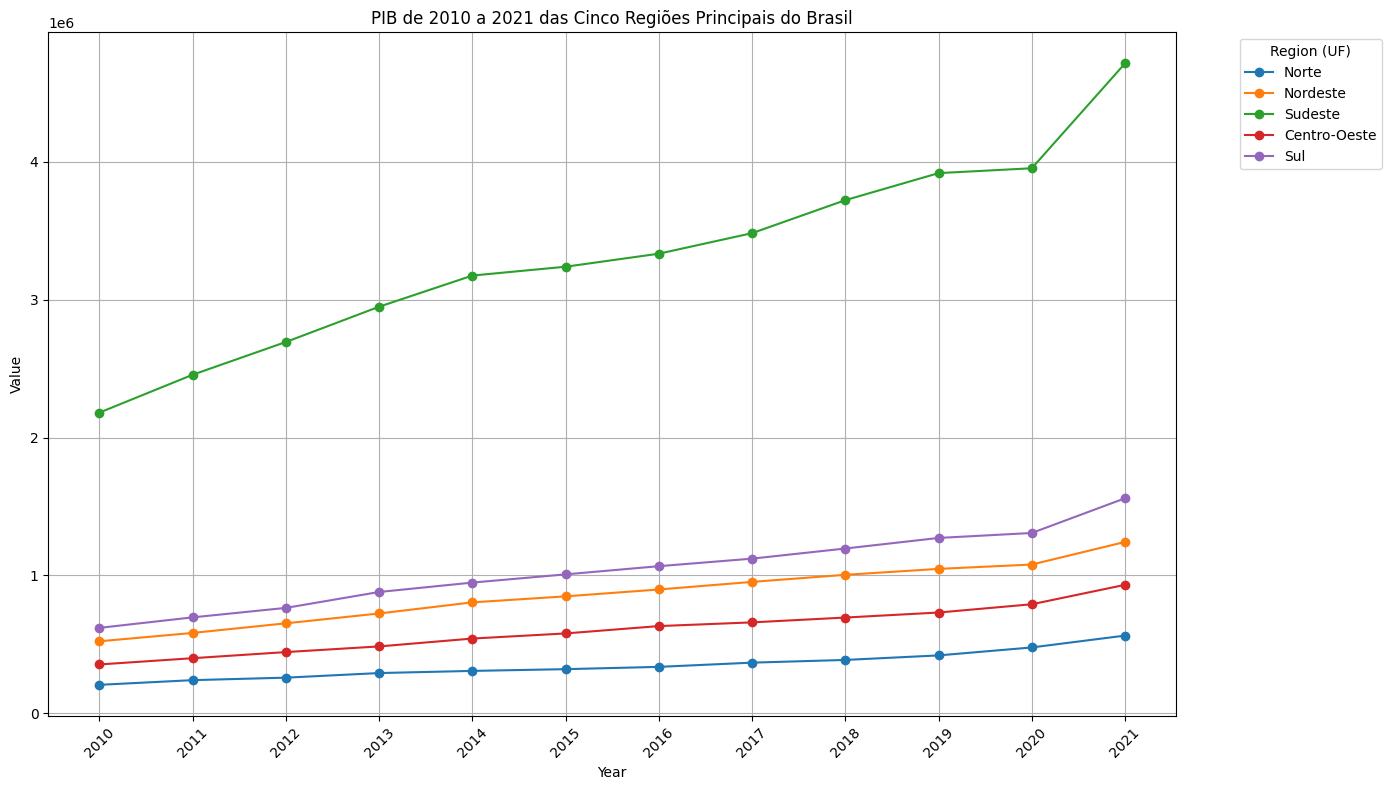

In [10]:
import matplotlib.pyplot as plt
print(pib_df.columns)

# regions_five: 브라질을 크게 5구역으로 나누는 통상적 개념
regions_five = ['Norte', 'Nordeste', 'Sudeste', 'Centro-Oeste', 'Sul']

# 'UF'가 regions_five에 해당하는 행만 필터링
df_filtered = pib_df[pib_df['UF'].isin(regions_five)]

years = [str(year) for year in range(2010, 2022)]  # 2010년부터 2021년까지

# 시각화
plt.figure(figsize=(14, 8))

# 각 지역별로 데이터를 추출해서 선 그래프 그리기
for uf in regions_five:
    region_data = df_filtered[df_filtered['UF'] == uf][years].T  # 해당 UF에 해당하는 행만 추출, 연도별 데이터 Transpose
    plt.plot(region_data.index, region_data.values, label=uf, marker='o')  # 선 그래프

plt.title('PIB de 2010 a 2021 das Cinco Regiões Principais do Brasil')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Region (UF)', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례
plt.grid(True)

plt.tight_layout()
plt.show()


# 소비자물가지수와 지급액의 변화를 연도별로 시각화

In [11]:
excel_file = os.path.join(base_path, 'ipca_202411SerieHist.xls')  # 구글 드라이브 내 엑셀 파일 경로

df = pd.read_excel(excel_file)

# 조건에 맞는 0번 인덱스 값을 필터링 (2013, 2018, 2021, 2023, 2024)
filtered_df = df[df.iloc[:, 0].isin([2013, 2018, 2021, 2023, 2024])]

# 필요한 열만 추출 (0번 인덱스와 2번 인덱스 값)
ipca_df = filtered_df.iloc[:, [0, 2]].reset_index(drop=True)

# 열 이름을 'ano'와 'NÚMERO ÍNDICE(DEZ 93 = 100)'로 변경
ipca_df.columns = ['ano', 'NÚMERO ÍNDICE(DEZ 93 = 100)']

# 맨 마지막 열을 추출하여 'VARIAÇÃO EM 12 MESES'라는 새로운 열로 추가
ipca_df['VARIAÇÃO EM 12 MESES'] = filtered_df.iloc[:, -1].reset_index(drop=True)

print(ipca_df)


    ano NÚMERO ÍNDICE(DEZ 93 = 100) VARIAÇÃO EM 12 MESES
0  2013                       3,633                    6
1  2018                       4,931                    3
2  2021                       5,574                    5
3  2023                       6,508                    6
4  2024                       6,802                    5


    Ano  Média de Pagamento (R$)  Índice IPCA (Dez 93 = 100)  \
0  2013                      142                       3,633   
1  2018                      183                       4,931   
2  2021                      191                       5,574   
3  2023                      645                       6,508   
4  2024                      686                       6,802   

   Variação do IPCA (%)  
0                     6  
1                     3  
2                     5  
3                     6  
4                     5  


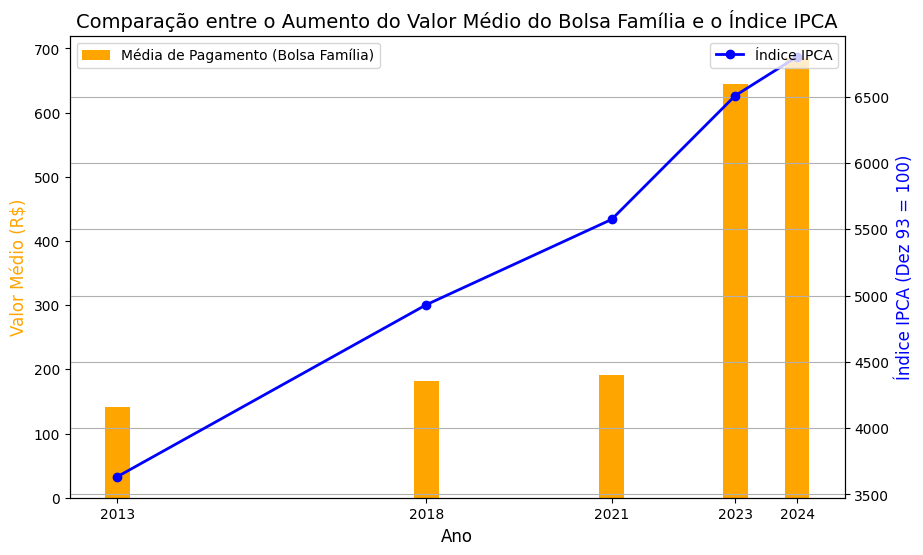

In [12]:
csv_files2 = [
    os.path.join(base_path, '201301_BolsaFamilia_filtered.csv'),
    os.path.join(base_path, '201801_BolsaFamilia_filtered.csv'),
    os.path.join(base_path, '202101_BolsaFamilia_filtered.csv'),
    os.path.join(base_path, '202303_BolsaFamilia_filtered.csv')
]

# 지급액 평균 계산
average_payments = []
years = [2013, 2018, 2021, 2023]  # IPCA와 동일한 연도 목록

for year in years:
    total_payment = 0
    count = 0  # 해당 연도의 지급액을 포함한 개수

    for csv_file in csv_files2:
        df = pd.read_csv(csv_file, sep=",")

        # 'VALOR' 열과 'MES_REFERENCIA' 열이 있는지 확인 후 평균 계산
        if 'VALOR' in df.columns and 'MES_REFERENCIA' in df.columns:
            # 'MES_REFERENCIA' 열에서 연도만 추출하여 해당 연도와 일치하는 데이터 필터링
            df['year'] = df['MES_REFERENCIA'].astype(str).str[:4].astype(int)

            # 해당 연도의 데이터만 필터링
            filtered_data = df[(df['year'] == year) & df['VALOR'].notna()]

            # 필터링된 데이터에서 'VALOR'의 총합과 개수 계산
            if len(filtered_data) > 0:
                total_payment += filtered_data['VALOR'].sum()
                count += len(filtered_data)

    # 해당 연도의 평균 지급액 계산
    if count > 0:
        yearly_avg_payment = total_payment / count
    else:
        yearly_avg_payment = 0  # 지급액이 없으면 0으로 처리

    average_payments.append(yearly_avg_payment)

# 2024년 지급액 평균 (주어진 값)
average_payments.append(685.61)  # 2024년 데이터 추가

# IPCA 데이터
ipca_data = {
    'ano': [2013, 2018, 2021, 2023, 2024],
    'NÚMERO ÍNDICE(DEZ 93 = 100)': [3633.44, 4930.72, 5574.49, 6508.4, 6801.72],
    'VARIAÇÃO EM 12 MESES': [6.15, 2.86, 4.56, 5.77, 4.51]  # IPCA 상승률 포함
}

# IPCA DataFrame 생성
ipca_df = pd.DataFrame(ipca_data)

# 평균과 IPCA 데이터를 결합하여 새로운 DataFrame 만들기
result_df = pd.DataFrame({
    'Ano': ipca_df['ano'],
    'Média de Pagamento (R$)': average_payments,
    'Índice IPCA (Dez 93 = 100)': ipca_df['NÚMERO ÍNDICE(DEZ 93 = 100)'],
    'Variação do IPCA (%)': ipca_df['VARIAÇÃO EM 12 MESES']
})

# 결과 DataFrame 출력
print(result_df)

# 시각화
ipca_values = ipca_df['NÚMERO ÍNDICE(DEZ 93 = 100)'].values  # IPCA 데이터에서 값 사용

# 평균 지급액이 None이 아닌 값만 필터링
valid_years = []
valid_avg_payments = []
valid_ipca_values = []

for i in range(len(ipca_df)):
    valid_years.append(ipca_df['ano'].iloc[i])
    valid_avg_payments.append(average_payments[i])
    valid_ipca_values.append(ipca_values[i])

# 플로팅
fig, ax = plt.subplots(figsize=(10, 6))

# 지급액 평균 상승률 시각화 (히스토그램/막대 그래프)
ax.bar(valid_years, valid_avg_payments, width=0.4, label='Média de Pagamento (Bolsa Família)', color='orange', align='center')

# IPCA 선 그래프 (NÚMERO ÍNDICE(DEZ 93 = 100))
ax2 = ax.twinx()
ax2.plot(valid_years, valid_ipca_values, label='Índice IPCA', color='blue', marker='o', linestyle='-', linewidth=2)

ax.set_xticks(valid_years)  # x축 값으로 유효한 연도만 설정

# 그래프 제목 및 레이블
ax.set_title('Comparação entre o Aumento do Valor Médio do Bolsa Família e o Índice IPCA', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Valor Médio (R$)', fontsize=12, color='orange')
ax2.set_ylabel('Índice IPCA (Dez 93 = 100)', fontsize=12, color='blue')

# 범례
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 출력
plt.grid(True)
plt.show()

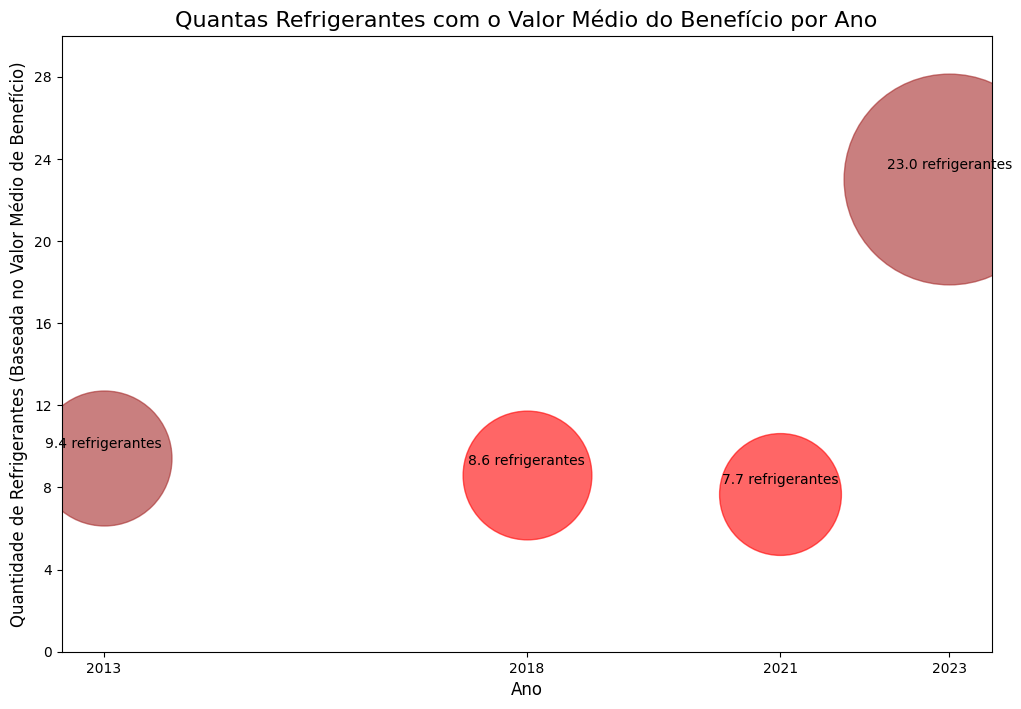

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터
data = {
    'Ano': [2013, 2018, 2021, 2023],
    'Average_Adjusted_Value': [68, 84, 85, 297],  # 각 연도의 평균 지원금 (R$)
    'Índice IPCA': [3633, 4931, 5574, 6508],  # 각 연도의 IPCA 물가 지수
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 2013년 기준 콜라 가격 예시 (7.2 헤알)
base_price = 7.2

# 각 연도별 콜라 가격 계산 (물가 상승률 반영)
df['Preço Ajustado Refrigerante'] = base_price * (df['Índice IPCA'] / df['Índice IPCA'][0])

# 각 연도별 콜라 개수 계산 (지원금으로 살 수 있는 콜라 개수)
df['Refrigerante Quantidade'] = df['Average_Adjusted_Value'] / df['Preço Ajustado Refrigerante']

# 시각화
plt.figure(figsize=(12, 8))
for index, row in df.iterrows():
    plt.scatter(row['Ano'], row['Refrigerante Quantidade'],
                s=row['Refrigerante Quantidade']*1000,
                color='brown' if row['Ano'] in [2023, 2013] else 'red',
                alpha=0.6)

# 제목과 레이블 추가
plt.title('Quantas Refrigerantes com o Valor Médio do Benefício por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Refrigerantes (Baseada no Valor Médio de Benefício)', fontsize=12)

# X축 레이블 추가 (2013, 2018, 2021, 2023만 표시)
plt.xticks([2013, 2018, 2021, 2023])
plt.ylim(0, 30)

plt.yticks(np.arange(0, 30, 4))

# 연도 레이블 추가
for index, row in df.iterrows():
    plt.text(row['Ano'], row['Refrigerante Quantidade'] + 0.5, f'{row["Refrigerante Quantidade"]:.1f} refrigerantes',
             horizontalalignment='center', fontsize=10)

plt.show()


# 친룰라 정권(지우마 호세프)의 지원금은 보우소나루 정권의 지원금보다 체감상 높았을까?

In [23]:
import pandas as pd
import numpy as np
import scipy.stats as stats

base_path = '/content/drive/MyDrive/빅데이터/'
file_2013 = base_path + '201301_BolsaFamilia_filtered.csv'
file_2021 = base_path + '202101_BolsaFamilia_filtered.csv'

df_2013 = pd.read_csv(file_2013)
df_2021 = pd.read_csv(file_2021)

print(df_2013.columns)  # 컬럼 확인
print(df_2021.columns)  # 컬럼 확인

# 평균 지원금 계산 (2013년과 2021년)
avg_2013 = df_2013['VALOR'].mean()
avg_2021 = df_2021['VALOR'].mean()

# IPCA 물가상승률 (2013년 기준)
ipca_2013 = 3633
ipca_2021 = 5574

# 2021년 물가상승률을 반영한 2013년 지원금 계산 (2013년 평균 * 2013년 대비 2021년 물가상승률 비율(1.534배))
adjusted_2013 = avg_2013 * (ipca_2021 / ipca_2013)

# 결과 출력: 2021년 물가상승률을 반영한 2013년 지원금과 2021년 지원금 비교
print(f"2021년 물가상승률을 반영한 2013년 지원금: {adjusted_2013}")
print(f"2021년 평균 지원금: {avg_2021}")

# 표본 평균과 표준편차 계산 (2021년 데이터)
mean_2021 = np.mean(df_2021['VALOR'])
std_2021 = np.std(df_2021['VALOR'], ddof=1)  # 표본 표준편차

# 표본
n_2021 = len(df_2021)

# z-점수 계산 (단측검정: 2013년 지원금이 더 크다는 가설)
z_score = (adjusted_2013 - mean_2021) / (std_2021 / np.sqrt(n_2021))

# p-value 계산
p_value = 1 - stats.norm.cdf(z_score)

print(f"z-점수: {z_score}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("대립가설을 채택합니다. 2021년의 물가상승률을 반영한 2013년 지원금이 2021년 지원금보다 더 높습니다.")
else:
    print("귀무가설을 채택합니다. 2021년의 물가상승률을 반영한 2013년 지원금과 2021년 지원금에는 차이가 없거나 2021년이 더 높습니다.")

Index(['MES_REFERENCIA', 'UF', 'NIS', 'FAVORECIDO', 'VALOR'], dtype='object')
Index(['MES_REFERENCIA', 'UF', 'NIS', 'FAVORECIDO', 'VALOR'], dtype='object')
2021년 물가상승률을 반영한 2013년 지원금: 217.99740175117014
2021년 평균 지원금: 190.56970850863675
z-점수: 977.3487461666224
p-value: 0.0
대립가설을 채택합니다. 2021년의 물가상승률을 반영한 2013년 지원금이 2021년 지원금보다 더 높습니다.


# K-means 클러스터링: 가구원수에 따른 차등지급제 반영하여 인당 평균 수령액 구하기


Cluster-wise average of 'VALOR' for 201301 (Sorted):
Cluster
3   463
1   305
2   217
6   170
5   136
0    89
4    45
Name: VALOR, dtype: float64
Cluster counts for 201301:
Cluster
0    5387900
5    2904224
6    1715310
2    1642263
4    1018182
1     914347
3     253760
Name: count, dtype: int64
Cluster centroids (Valor means for each cluster) for 201301:
[[ 89.20073646]
 [304.9018283 ]
 [216.85482167]
 [463.30662043]
 [ 45.44320367]
 [135.94933827]
 [170.05911876]]


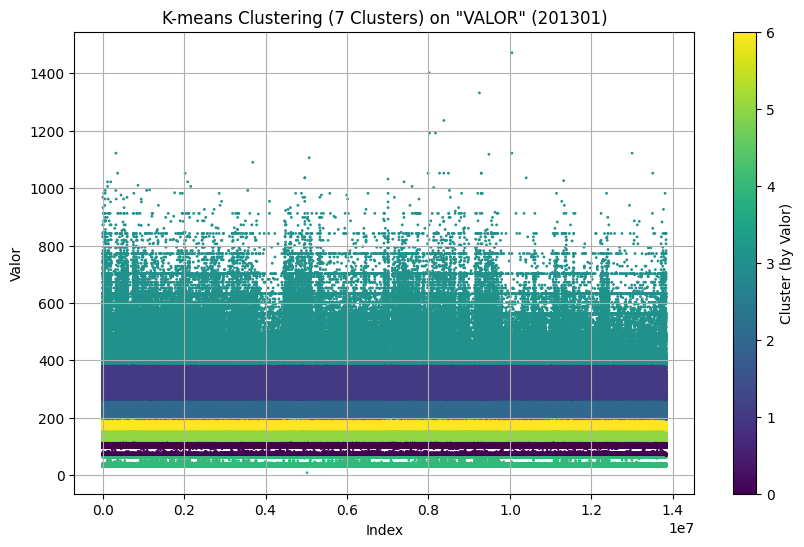


Cluster-wise average of 'VALOR' for 201801 (Sorted):
Cluster
3   565
0   369
5   263
4   208
6   165
1   125
2    76
Name: VALOR, dtype: float64
Cluster counts for 201801:
Cluster
2    1517507
6    1388304
1    1308127
5     901430
4     763661
0     588312
3     152368
Name: count, dtype: int64
Cluster centroids (Valor means for each cluster) for 201801:
[[368.82126831]
 [125.11473427]
 [ 75.99182145]
 [565.3582117 ]
 [208.30236584]
 [263.44019391]
 [165.49553268]]


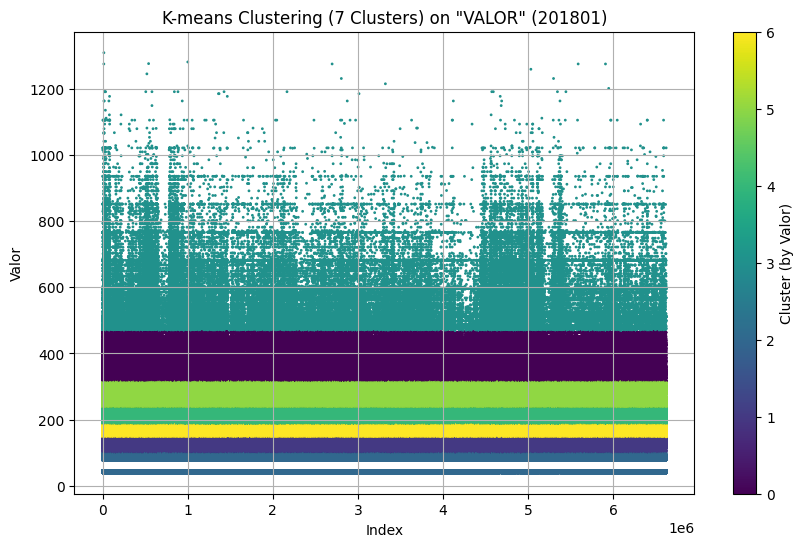


Cluster-wise average of 'VALOR' for 202101 (Sorted):
Cluster
2   516
1   360
6   269
3   217
5   174
0   131
4    84
Name: VALOR, dtype: float64
Cluster counts for 202101:
Cluster
4    3352256
5    3203248
0    2636364
6    1949021
3    1387554
1    1157089
2     547171
Name: count, dtype: int64
Cluster centroids (Valor means for each cluster) for 202101:
[[131.44637501]
 [360.03925886]
 [516.23066098]
 [217.28086763]
 [ 84.33180998]
 [174.13635472]
 [269.22489547]]


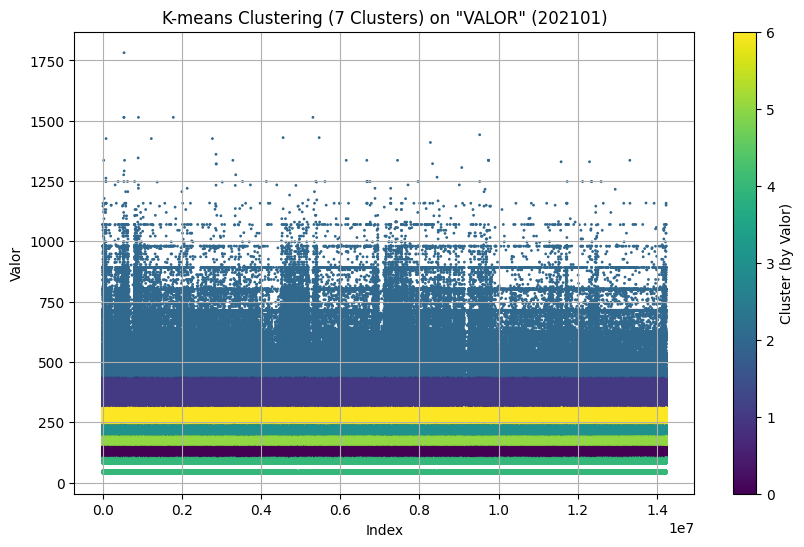


Cluster-wise average of 'VALOR' for 202303 (Sorted):
Cluster
6   1,351
4   1,073
3     905
1     790
5     749
0     600
2     443
Name: VALOR, dtype: float64
Cluster counts for 202303:
Cluster
0    12326226
5     4607310
2     1826869
3     1046121
1      314483
4      215533
6       48015
Name: count, dtype: int64
Cluster centroids (Valor means for each cluster) for 202303:
[[ 600.03051891]
 [ 790.21556014]
 [ 442.93057138]
 [ 904.56236611]
 [1072.99067142]
 [ 748.63765321]
 [1350.94701297]]


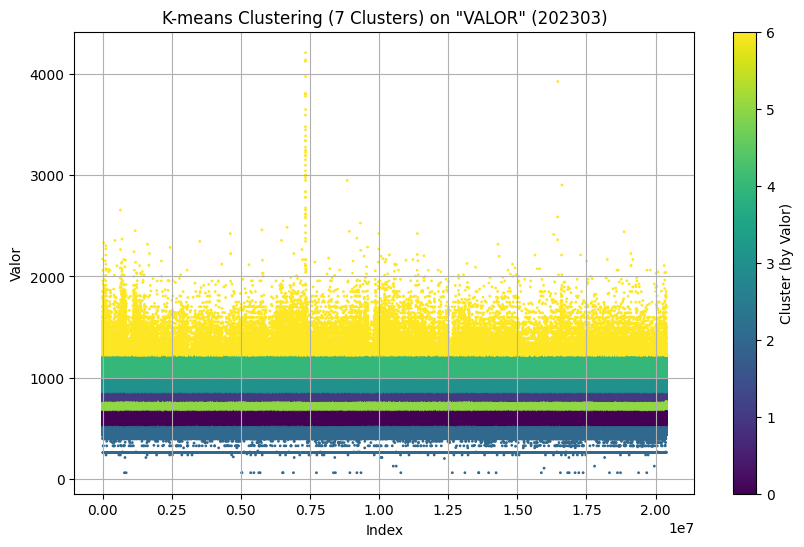

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

filtered_csv = [
    os.path.join(base_path, '201301_BolsaFamilia_filtered.csv'),
    os.path.join(base_path, '201801_BolsaFamilia_filtered.csv'),
    os.path.join(base_path, '202101_BolsaFamilia_filtered.csv'),
    os.path.join(base_path, '202303_BolsaFamilia_filtered.csv')
]

# 연도별로 처리 및 K-means 클러스터링
for file in filtered_csv:
    df = pd.read_csv(file)

    # 'VALOR' 열 데이터 추출
    valor_data = df['VALOR'].values.reshape(-1, 1)  # 2D 배열로 변환

    # K-means 클러스터링 (7개의 클러스터)
    kmeans = KMeans(n_clusters=7, random_state=42)
    kmeans.fit(valor_data)

    df['Cluster'] = kmeans.labels_

    # 각 클러스터의 평균값 계산
    cluster_means = df.groupby('Cluster')['VALOR'].mean()

    # 평균값을 기준으로 클러스터 번호 정렬
    sorted_clusters = cluster_means.sort_values(ascending=False).index

    # 정렬된 클러스터 번호를 다시 레이블로 설정
    df['Sorted_Cluster'] = df['Cluster'].apply(lambda x: sorted_clusters.get_loc(x))

    # 연도 추출 (파일 이름에서, 경로를 제거하고 연도만 추출)
    year = os.path.basename(file).split('_')[0]

    # 클러스터별 평균 값을 df화
    cluster_avg_df = cluster_means.reset_index()
    cluster_avg_df.columns = ['Cluster', 'Average_Valor']

    # csv로 저장
    output_csv = os.path.join(base_path, f'{year}_클러스터별_평균.csv')
    cluster_avg_df.to_csv(output_csv, index=False)

    # 클러스터링 결과 시각화 (정렬된 클러스터 번호 사용)
    plt.figure(figsize=(10, 6))

    # 값이 높은 클러스터는 밝은 색으로
    scatter = plt.scatter(df.index, df['VALOR'], c=df['Cluster'], cmap='viridis', marker='o', s=1)  # 점 크기 1로 설정

    plt.title(f'K-means Clustering (7 Clusters) on "VALOR" ({year})')
    plt.xlabel('Index')
    plt.ylabel('Valor')

    # colorbar 추가
    cbar = plt.colorbar(scatter)
    cbar.set_label('Cluster (by Valor)')

    # 클러스터별 평균값 출력
    print(f"\nCluster-wise average of 'VALOR' for {year} (Sorted):")
    print(cluster_means.sort_values(ascending=False))

    # 클러스터별 데이터 개수 출력
    print(f"Cluster counts for {year}:")
    print(df['Cluster'].value_counts())

    # 클러스터의 중심값 (centroids) 출력
    print(f"Cluster centroids (Valor means for each cluster) for {year}:")
    print(kmeans.cluster_centers_)

    # 그래프 출력
    plt.grid(True)
    plt.show()

#과연 연도별로 인당 평균 수령액은 얼마나 될까?

In [16]:
csv_files = [
    '201301_클러스터별_평균.csv',
    '201801_클러스터별_평균.csv',
    '202101_클러스터별_평균.csv',
    '202303_클러스터별_평균.csv'
]

# 나누는 기준: 수령액 등급에 따라 가구원 예상
division_values = [5, 4, 3, 1, 5, 4, 3]

final_results = []

# 각 연도별로 처리
for csv_file in csv_files:
    file_path = os.path.join(base_path, csv_file)

    df = pd.read_csv(file_path)

    # 'Average_Valor'가 숫자인 값만 선택 (NaN 및 비숫자 값 제외)
    df = df[pd.to_numeric(df['Average_Valor'], errors='coerce').notnull()]

    # 2열 (Average_Valor) 값을 기준으로 내림차순 정렬
    df_sorted = df.sort_values(by='Average_Valor', ascending=False)

    # 순위에 맞는 나누기
    df_sorted['Adjusted_Value'] = df_sorted['Average_Valor'] / division_values

    total_adjusted_value = df_sorted['Adjusted_Value'].sum()

    # 7(클러스터 수)로 나누어 평균 계산
    average_adjusted_value = total_adjusted_value / 7

    # 결과 저장 (연도, 평균 값)
    year = os.path.basename(file_path).split('_')[0]  # 파일 이름에서 연도 추출
    final_results.append({'Year': year, 'Average_Adjusted_Value': average_adjusted_value})

final_df = pd.DataFrame(final_results)

# 결과 출력
print(final_df)

# 최종 결과를 CSV로 저장
final_df.to_csv(os.path.join(base_path, '클러스터별_평균_결과.csv'), index=False)


     Year  Average_Adjusted_Value
0  201301                      68
1  201801                      84
2  202101                      85
3  202303                     297


# 미출금 금액 데이터를 통해 잉여 지원금 계산

In [17]:
import pandas as pd

base_path = '/content/drive/MyDrive/빅데이터/'
file_path = base_path + "/Bolsa Familia Base.csv"

# CSV 파일 읽기 (인코딩을 ISO-8859-1로 지정)
df = pd.read_csv(file_path, sep=";", encoding='ISO-8859-1')

In [18]:
import pandas as pd

base_path = '/content/drive/MyDrive/빅데이터/'
file_path = base_path + "/Bolsa Familia Base.csv"

# CSV 파일 읽기 (인코딩을 ISO-8859-1로 지정)
df = pd.read_csv(file_path, sep=";", encoding='ISO-8859-1')

# 'Mes Arquivo', 'Regiao', 'Estado', 'Saldo de Sobra', 'Percentual de Sobra' 열만 필터링
df_filtered = df[['Mes Arquivo', 'Regiao', 'Estado', 'Saldo de Sobra', 'Percentual de Sobra']]

# 'Mes Arquivo'에서 연도 정보 추출
df_filtered['ANO'] = df_filtered['Mes Arquivo'].str.split('/').str[2]

# 'Saldo de Sobra'에서 통화 형식 및 천 단위 구분자, ','을 '.'로 바꾸어 숫자형으로 변환
df_filtered['Saldo de Sobra'] = df_filtered['Saldo de Sobra'].replace({'R\$': '', ',': ''}, regex=True)  # 'R$' 제거, ','은 남겨둠

# 잘못된 값을 NaN으로 대체
df_filtered['Saldo de Sobra'] = df_filtered['Saldo de Sobra'].replace({'- ': 'NaN', ' ': 'NaN'}, regex=True)

# 천 단위 구분자 제거 후 ','을 '.'로 변환
df_filtered['Saldo de Sobra'] = df_filtered['Saldo de Sobra'].str.replace('.', '').str.replace(',', '.')
df_filtered['Saldo de Sobra'] = pd.to_numeric(df_filtered['Saldo de Sobra'], errors='coerce')  # 변환할 수 없는 값은 NaN으로 처리

# "Percentual de Sobra"에서 ','와 '%'를 제거
df_filtered['Percentual de Sobra'] = df_filtered['Percentual de Sobra'].replace({'%': '', ',': ''}, regex=True)  # '%' 제거


# Percentual de Sobra를 숫자형으로 변환
df_filtered['Percentual de Sobra'] = pd.to_numeric(df_filtered['Percentual de Sobra'], errors='coerce')

# 퍼센트 값을 100으로 나누어 백분율 -> 실수 변환
df_filtered['Percentual de Sobra'] = df_filtered['Percentual de Sobra'] / 100

# 범위 밖의 값은 NaN으로 처리
df_filtered['Percentual de Sobra'] = df_filtered['Percentual de Sobra'].where(df_filtered['Percentual de Sobra'].between(-100, 100), other=pd.NA)

# 주별(Estado), 연도별(ANO)로 'Saldo de Sobra'와 'Percentual de Sobra'의 평균 계산
df_avg = df_filtered.groupby(['ANO', 'Regiao', 'Estado'], as_index=False)[['Saldo de Sobra', 'Percentual de Sobra']].mean()

print(df_avg)

<ipython-input-18-5f89e6d823ca>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ANO'] = df_filtered['Mes Arquivo'].str.split('/').str[2]
<ipython-input-18-5f89e6d823ca>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Saldo de Sobra'] = df_filtered['Saldo de Sobra'].replace({'R\$': '', ',': ''}, regex=True)  # 'R$' 제거, ','은 남겨둠
<ipython-input-18-5f89e6d823ca>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

      ANO        Regiao              Estado  Saldo de Sobra  \
0    2013  Centro-Oeste    Distrito Federal      82,826,727   
1    2013  Centro-Oeste               Goiás         992,710   
2    2013  Centro-Oeste         Mato Grosso         946,488   
3    2013  Centro-Oeste  Mato Grosso do Sul       1,553,276   
4    2013      Nordeste             Alagoas       1,566,673   
..    ...           ...                 ...             ...   
159  2018       Sudeste      Rio de Janeiro      14,564,675   
160  2018       Sudeste           São Paulo       4,475,098   
161  2018           Sul              Paraná       1,539,613   
162  2018           Sul   Rio Grande do Sul       1,212,628   
163  2018           Sul      Santa Catarina         842,444   

     Percentual de Sobra  
0                      7  
1                      5  
2                      6  
3                      6  
4                      2  
..                   ...  
159                    9  
160                   11  


<ipython-input-18-5f89e6d823ca>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Percentual de Sobra'] = df_filtered['Percentual de Sobra'].replace({'%': '', ',': ''}, regex=True)  # '%' 제거
<ipython-input-18-5f89e6d823ca>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Percentual de Sobra'] = pd.to_numeric(df_filtered['Percentual de Sobra'], errors='coerce')
<ipython-input-18-5f89e6d823ca>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [19]:
print(df_avg)

      ANO        Regiao              Estado  Saldo de Sobra  \
0    2013  Centro-Oeste    Distrito Federal      82,826,727   
1    2013  Centro-Oeste               Goiás         992,710   
2    2013  Centro-Oeste         Mato Grosso         946,488   
3    2013  Centro-Oeste  Mato Grosso do Sul       1,553,276   
4    2013      Nordeste             Alagoas       1,566,673   
..    ...           ...                 ...             ...   
159  2018       Sudeste      Rio de Janeiro      14,564,675   
160  2018       Sudeste           São Paulo       4,475,098   
161  2018           Sul              Paraná       1,539,613   
162  2018           Sul   Rio Grande do Sul       1,212,628   
163  2018           Sul      Santa Catarina         842,444   

     Percentual de Sobra  
0                      7  
1                      5  
2                      6  
3                      6  
4                      2  
..                   ...  
159                    9  
160                   11  


In [20]:
# Estado 값에 대응되는 축약형 딕셔너리
uf_fullname_dict = {
    "Norte": "Norte", "Rondônia": "RO", "Acre": "AC", "Amazonas": "AM", "Roraima": "RR", "Pará": "PA", "Amapá": "AP",
    "Tocantins": "TO", "Nordeste": "Nordeste", "Maranhão": "MA", "Piauí": "PI", "Ceará": "CE", "Rio Grande do Norte": "RN",
    "Paraíba": "PB", "Pernambuco": "PE", "Alagoas": "AL", "Sergipe": "SE", "Bahia": "BA", "Sudeste": "Sudeste", "Minas Gerais": "MG",
    "Espírito Santo": "ES", "Rio de Janeiro": "RJ", "São Paulo": "SP", "Sul": "Sul", "Paraná": "PR", "Santa Catarina": "SC",
    "Rio Grande do Sul": "RS", "Centro-Oeste": "Centro-Oeste", "Mato Grosso do Sul": "MS", "Mato Grosso": "MT", "Goiás": "GO",
    "Distrito Federal": "DF"
}

# 'Estado' 열을 적용하여 축약형으로 변환
df_avg['Estado'] = df_avg['Estado'].apply(lambda x: uf_fullname_dict.get(x, x))

print(df_avg)

      ANO        Regiao Estado  Saldo de Sobra  Percentual de Sobra
0    2013  Centro-Oeste     DF      82,826,727                    7
1    2013  Centro-Oeste     GO         992,710                    5
2    2013  Centro-Oeste     MT         946,488                    6
3    2013  Centro-Oeste     MS       1,553,276                    6
4    2013      Nordeste     AL       1,566,673                    2
..    ...           ...    ...             ...                  ...
159  2018       Sudeste     RJ      14,564,675                    9
160  2018       Sudeste     SP       4,475,098                   11
161  2018           Sul     PR       1,539,613                   11
162  2018           Sul     RS       1,212,628                   11
163  2018           Sul     SC         842,444                   13

[164 rows x 5 columns]


In [21]:
import json
import folium
from folium import Choropleth
import pandas as pd

base_path = '/content/drive/My Drive/빅데이터/'

file_name = 'Brasil.json'

file_path = base_path + file_name

# 'Brasil.json' 파일 로드
with open(file_path, 'r') as f:
    brasil_geojson = json.load(f)

# 각 주별로 평균 Percentual de Sobra를 계산
df_avg_grouped = df_avg.groupby('Estado')['Percentual de Sobra'].mean().reset_index()
print(df_avg_grouped)

# df_avg_grouped 데이터와 geojson의 'ESTADO' 값을 기준으로 매칭
# GeoJSON에서 'properties'의 'UF'와 df_avg_grouped의 'Estado'를 매칭하여 Percentual de Sobra 값을 추가
for feature in brasil_geojson['features']:
    estado = feature['properties']['UF']
    matching_row = df_avg_grouped[df_avg_grouped['Estado'] == estado]
    if not matching_row.empty:
        feature['properties']['Percentual de Sobra'] = int(matching_row['Percentual de Sobra'].values[0])
    else:
        feature['properties']['Percentual de Sobra'] = None  # 매칭되지 않는 경우 None 처리

# 최대 Percentual de Sobra 값 찾기
max_percentual = df_avg_grouped['Percentual de Sobra'].max()
min_percentual = df_avg_grouped['Percentual de Sobra'].min()  # 최소값도 구합니다.

# Folium을 이용한 지도 생성
brasil_map3 = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Choropleth로 히트맵 추가
choropleth = Choropleth(
    geo_data=brasil_geojson,
    data=df_avg_grouped,
    columns=['Estado', 'Percentual de Sobra'],
    key_on='feature.properties.UF',  # 'properties'에서 'UF'를 기준으로 히트맵 표시
    fill_color='Blues',  # 색상 스케일을 파란색 계열로 설정
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentual de Sobra',
    threshold_scale=[i for i in range(0, 16, 4)]  # 0부터 100까지 10단계로 설정
).add_to(brasil_map3)

title = "Percentual de Sobra por Estado"
title_html = f'<h3 align="center" style="font-size:20px"><b>{title}</b></h3>'
brasil_map3.get_root().html.add_child(folium.Element(title_html))

file_path_with_title = '/content/Percentual_de_Sobra_por_Estado_Avg.html'
brasil_map3.save(file_path_with_title)

# 지도 디스플레이
brasil_map3

   Estado  Percentual de Sobra
0      AC                    3
1      AL                    3
2      AM                    4
3      AP                    4
4      BA                    3
5      CE                    3
6      DF                    7
7      ES                    8
8      GO                    6
9      MA                    4
10     MG                    6
11     MS                    7
12     MT                    8
13     PA                    4
14     PB                    2
15     PE                    3
16     PI                    2
17     PR                    8
18     RJ                    6
19     RN                    3
20     RO                    8
21     RR                    5
22     RS                    8
23     SC                    9
24     SE                    3
25     SP                    8
26     TO                    5
